In [2]:
import numpy as np
from librosa.core import stft
import matplotlib.pyplot as plt

In [3]:
np.random.seed(3)
y = np.sin(2*np.pi*50*np.linspace(0,10,2048))+np.sin(2*np.pi*20*np.linspace(0,10,2048)) + np.random.normal(scale=1,size=2048)

In [4]:
S_stft = np.abs(stft(y, hop_length=512, n_fft=2048,center=False))

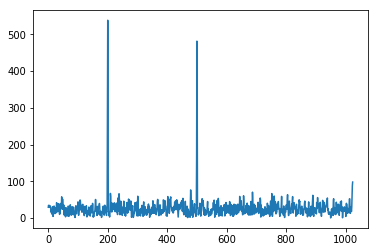

In [5]:
plt.plot(S_stft)

# Pytorch version

In [6]:
import torch
from torch.autograd import Variable
from torch.nn.functional import conv1d

from scipy.signal.windows import hann

In [7]:
stride = 512

In [8]:
def create_filters(d,k,low=50,high=6000):
    x = np.arange(0, d, 1)
    wsin = np.empty((k,1,d), dtype=np.float32)
    wcos = np.empty((k,1,d), dtype=np.float32)
    start_freq = low
    end_freq = high
    # num_cycles = start_freq*d/44000.
    # scaling_ind = np.log(end_freq/start_freq)/k
    
    window_mask = hann(2048, sym=False) # same as 0.5-0.5*np.cos(2*np.pi*x/(k))
    for ind in range(k):
        wsin[ind,0,:] = window_mask*np.sin(2*np.pi*ind/k*x)
        wcos[ind,0,:] = window_mask*np.cos(2*np.pi*ind/k*x)
    
    return wsin,wcos

In [9]:
wsin, wcos = create_filters(2048,2048)

([], <a list of 0 Text xticklabel objects>)

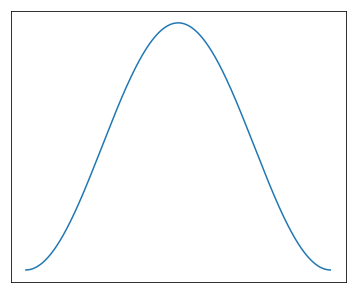

In [15]:
plt.figure(figsize=(6,5))
plt.plot( hann(2048, sym=False))
plt.yticks([])
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

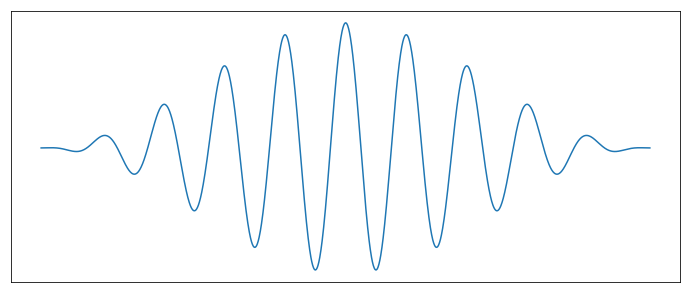

In [16]:
plt.figure(figsize=(12,5))
plt.plot(wcos[10,0])
plt.yticks([])
plt.xticks([])

In [162]:
wsin_var = Variable(torch.from_numpy(wsin), requires_grad=False)
wcos_var = Variable(torch.from_numpy(wcos),requires_grad=False)

In [163]:
network_input = torch.from_numpy(y).float()

In [164]:
network_input = network_input.reshape(1,-1)

In [165]:
zx = np.sqrt(conv1d(network_input[:,None,:], wsin_var, stride=stride).pow(2)+conv1d(network_input[:,None,:], wcos_var, stride=stride).pow(2))

In [166]:
pytorch_Xs = zx.cpu().numpy()

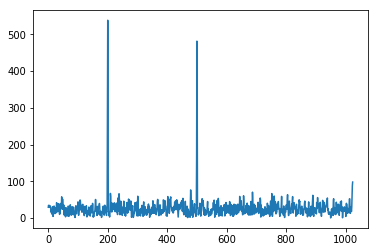

In [167]:
plt.plot(pytorch_Xs[0,:1025,0])

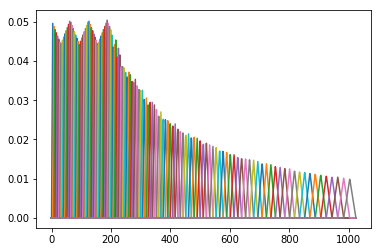

In [34]:
from librosa import mel_frequencies, fft_frequencies
from librosa.filters import mel
import matplotlib.pyplot as plt

mel_basis = mel(sr=10000, n_fft=2048, n_mels=128)

# 10 filters, 512 window size, 5000 sampling rate 

for i in range(len(mel_basis)):
    plt.plot(mel_basis[i])

In [35]:
mel_basis.shape

(128, 1025)

In [36]:
S_stft.shape

(1025, 1)

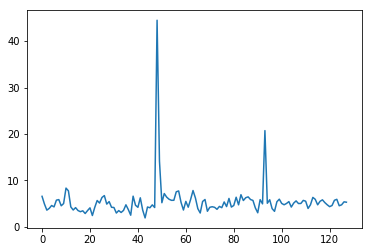

In [37]:
plt.plot(np.dot(mel_basis,S_stft))

In [168]:
np.allclose(S_stft, pytorch_Xs[0,:1025,0].reshape(1025,1),atol=1e-5)

True

In [169]:
np.allclose(S_stft, pytorch_Xs[0,:1025,0].reshape(1025,1),atol=1e-6)

False